# 1

Индекс джини равен: 
$$G = \sum_{i = 1}^k p_i (1 - p_i)$$
Пусть у нас $k = 2$, найдем при каких $p_1$ и $p_2$ индекс джини принимает максимальное значение. Для удобства обозначим $p_1$ и $p_2$ как  $x$ и $y$, тогда коэффициент джини будет функцией двух переменных $f(x, y) = x(1 - x) + y(1 - y)$. Найдем экстремумы этой функции.

$$
\ \\
f(x, y) = x(1 - x) + y(1 - y) = x - x^2 + y - y^2\\
\ \\
\frac{df}{dx} = 1 - 2x = 0 \\
x = \frac{1}{2} \\
\frac{df}{dy} = 1 - 2y = 0 \\
y = \frac{1}{2} \\
\ \\
f(0.5, 0.5) = 0.5 - 0.25 + 0.5 - 0.25 = 0.5
$$

Заметим, что при $x < 0.5 : \frac{df}{dx} > 0$, а при $x > 0.5 : \frac{df}{dx} < 0 $ (функция растет при $x$ приближающимся к $0.5$ от минус бесконечности и функция падает при $x$ приближающимся к $0.5$ от плюс бесконечности), аналогичное справедливо и для $y$, что означает, что точка $x = 0.5$, $y = 0.5$ является точкой глобального максимума

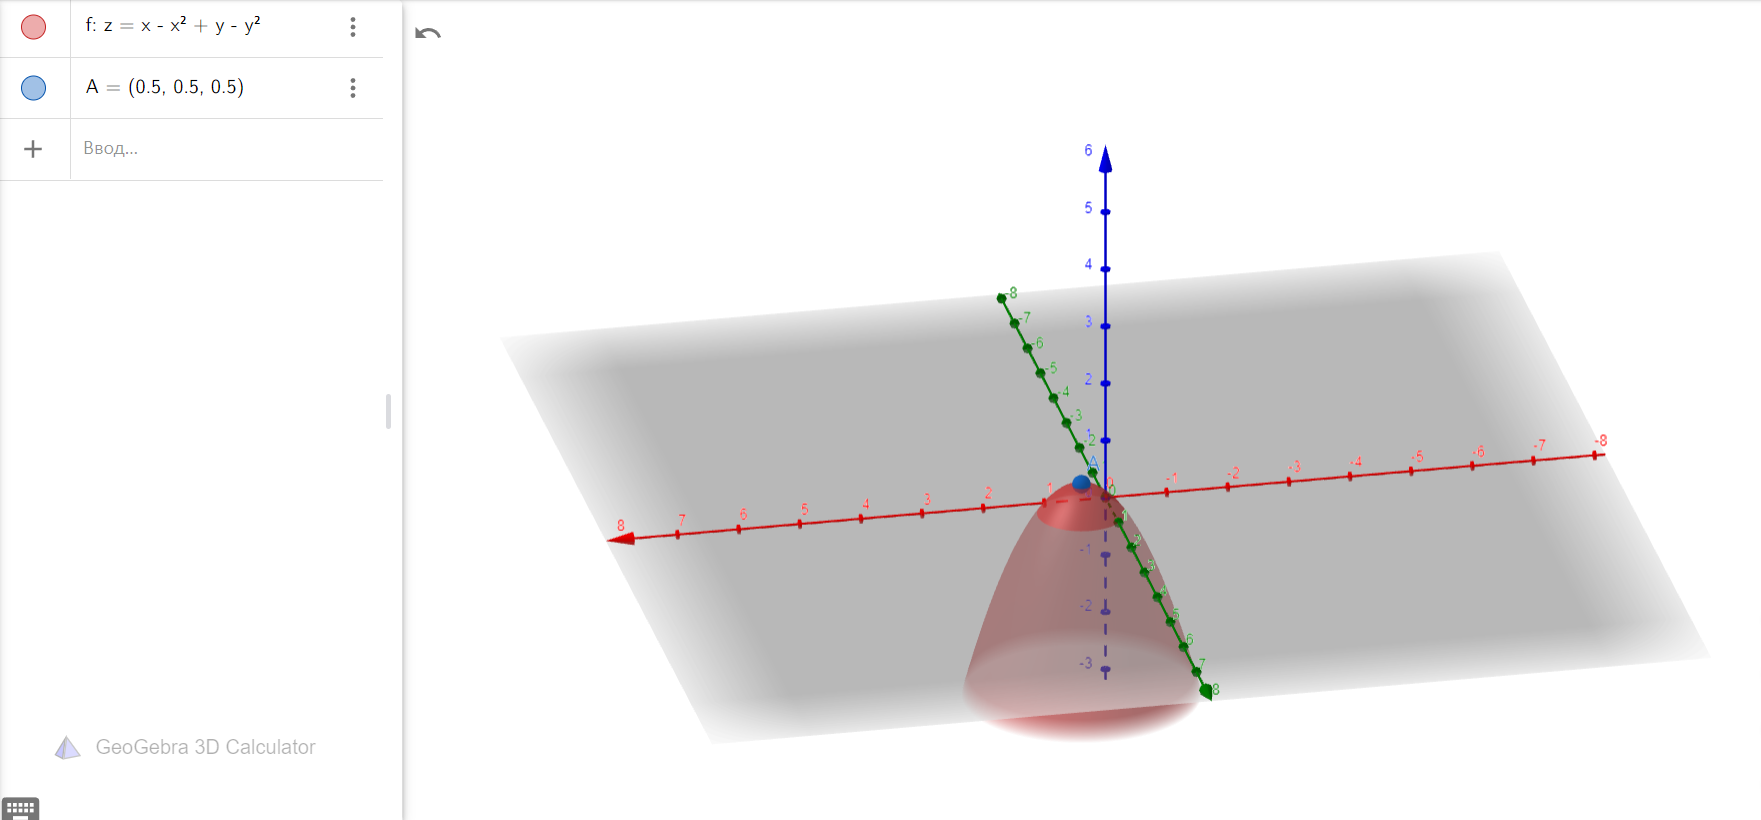

# 2



1.   Взять случайный признак $d_i$
2.   Найти объект с минимальным значением признака $d_i$
3.   Отделить его от остальной выборки
4.   Найти следующий объект с минимальным значением признака $d_i$
5.   Отделить его от остальной выборки
6.   Если несколько объектов обладают одним и тем же значением признака, берем случайный признак из оставшихся и отбираем уже по нему.

Повторяем действия пока в каждом листе не окажется по одному объекту выборки

В итоге получится дерево глубиной в $n$



# 3

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv('BRCA_pam50.tsv', sep = '\t', index_col = 0)

X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=17)

model = RandomForestClassifier()
params = {'max_depth': range(1, 10, 2)}
clf = GridSearchCV(model, param_grid = params,  cv = RepeatedStratifiedKFold(n_repeats=10))
clf.fit(X_train, y_train)

print(clf.best_params_)
print(balanced_accuracy_score(y_train, clf.predict(X_train)))

{'max_depth': 9}
0.9889970376639865


# 4

In [49]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.3 MB/s 


In [55]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pickle5 as pkl

0.6041666666666666
TPR: 0.4583333333333333
TNR: 0.75



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


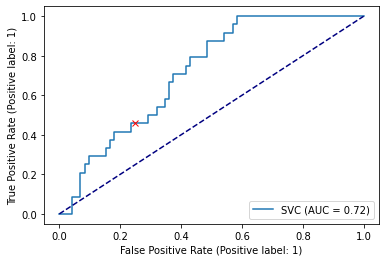

In [59]:
with open("bc_data.pkl", "rb") as f:
    object = pkl.load(f)
df = pd.DataFrame(object)

with open("bc_ann.pkl", "rb") as f:
    object = pkl.load(f)
an = pd.DataFrame(object)

X_train = df.loc[an["Dataset type"] == "Training"].to_numpy()
y_train = an.loc[an["Dataset type"] == "Training", "Class"].to_numpy()

X_test = df.loc[an["Dataset type"] == "Validation"].to_numpy()
y_test = an.loc[an["Dataset type"] == "Validation", "Class"].to_numpy()

model = SVC(kernel="linear", class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)

TP = M[1, 1]
TN = M[0, 0]
FN = M[1, 0]
FP = M[0, 1]
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print(f'TPR: {TPR}\nTNR: {TNR}\n')

plot_roc_curve(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.plot(1 - TNR, TPR, "x", c="red")

0.7569444444444444
TPR: 0.7083333333333334
TNR: 0.8055555555555556



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


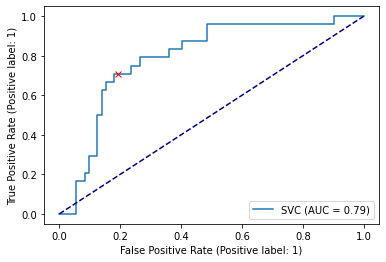

In [60]:
genes = 'TRIP13;UBE2C;ZWINT;EPN3;KIF4A;ECHDC2;MTFR1;CX3CR1;SLC7A5;ABAT;CFAP69'.split(';')
df = df[genes]

X_train = df.loc[an["Dataset type"] == "Training"].to_numpy()
y_train = an.loc[an["Dataset type"] == "Training", "Class"].to_numpy()

X_test = df.loc[an["Dataset type"] == "Validation"].to_numpy()
y_test = an.loc[an["Dataset type"] == "Validation", "Class"].to_numpy()

model = SVC(kernel="linear", class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)

TP = M[1, 1]
TN = M[0, 0]
FN = M[1, 0]
FP = M[0, 1]
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print(f'TPR: {TPR}\nTNR: {TNR}\n')

plot_roc_curve(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.plot(1 - TNR, TPR, "x", c="red")

# 5

In [13]:
from scipy.stats import *

import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('BRCA_pam50.tsv', sep = '\t', index_col = 0)
df = df.iloc[:, :-1]

t_test = abs(ttest_ind(df.iloc[:816, :], df.iloc[816:, :])[0])
genes = df.columns[t_test > abs(t.ppf(0.05/2, df = len(df) - 2))].to_list()
print(len(genes))
print(len(genes)/len(df.columns))

48
0.96
